In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob as glob
import os

Data Preparation

In [2]:

path= "D:\\Main\\Personal Project\\Datavidia\\Harga Bahan Pangan\\train"

allTrainData = glob.glob(os.path.join(path, "*.csv"))

dfFull =[]

for file in allTrainData:
    commodity = os.path.basename(file).replace(".csv","")

    dftemp = pd.read_csv(file , index_col = 0)
    dftemp.fillna(method = "ffill", inplace= True)
    dftemp.fillna(method = "bfill", inplace= True)

    # Drop rows with NULL values instead of filling
    # dftemp.dropna(inplace=True)

    dftemp = dftemp.melt(ignore_index=False, var_name= "Provinsi", value_name= "Price")
    dftemp.reset_index(inplace=True)

    dftemp["Commodity"] = commodity

    dfFull.append(dftemp)

dfFull = pd.concat(dfFull, ignore_index=True)

dfFull.sort_values(by=['Date', 'Provinsi'], inplace= True)
dfFull.reset_index(drop=True, inplace=True)
dfFull["Date"] = pd.to_datetime(dfFull["Date"])

dfFull.info()
dfFull

C:\Users\hi\AppData\Local\Temp\ipykernel_6548\105626817.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dftemp.fillna(method = "ffill", inplace= True)
C:\Users\hi\AppData\Local\Temp\ipykernel_6548\105626817.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dftemp.fillna(method = "bfill", inplace= True)
C:\Users\hi\AppData\Local\Temp\ipykernel_6548\105626817.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dftemp.fillna(method = "ffill", inplace= True)
C:\Users\hi\AppData\Local\Temp\ipykernel_6548\105626817.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dftemp.fillna(method = "bfill", inplace= True)
C:\Users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443768 entries, 0 to 443767
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       443768 non-null  datetime64[ns]
 1   Provinsi   443768 non-null  object        
 2   Price      443768 non-null  float64       
 3   Commodity  443768 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.5+ MB


,Date,Provinsi,Price,Commodity
0,2022-01-01,Aceh,28970.0,Bawang Merah
1,2022-01-01,Aceh,27440.0,Bawang Putih Bonggol
2,2022-01-01,Aceh,11030.0,Beras Medium
3,2022-01-01,Aceh,12080.0,Beras Premium
4,2022-01-01,Aceh,22360.0,Cabai Merah Keriting
...,...,...,...,...
443763,2024-09-30,Sumatera Utara,17920.0,Gula Konsumsi
443764,2024-09-30,Sumatera Utara,16280.0,Minyak Goreng Curah
443765,2024-09-30,Sumatera Utara,18100.0,Minyak Goreng Kemasan Sederhana
443766,2024-09-30,Sumatera Utara,27640.0,Telur Ayam Ras


In [3]:
# dfFullCP1 = dfFull.copy()

# dfMYRUSD = pd.read_csv(r"E:\Xov\Adobe and other stuff\Coding\Python\Arkavidia\comodity-price-prediction-penyisihan-arkavidia-9\Mata Uang\MYRUSD=X.csv")
# dfSGDUSD = pd.read_csv(r"E:\Xov\Adobe and other stuff\Coding\Python\Arkavidia\comodity-price-prediction-penyisihan-arkavidia-9\Mata Uang\SGDUSD=X.csv")
# dfTHBUSD = pd.read_csv(r"E:\Xov\Adobe and other stuff\Coding\Python\Arkavidia\comodity-price-prediction-penyisihan-arkavidia-9\Mata Uang\THBUSD=X.csv")
# dfUSDIDR = pd.read_csv(r"E:\Xov\Adobe and other stuff\Coding\Python\Arkavidia\comodity-price-prediction-penyisihan-arkavidia-9\Mata Uang\USDIDR=X.csv")

# dfMYRUSD = dfMYRUSD.rename(columns={"Open": "Open_MYR", "High": "High_MYR", "Low": "Low_MYR", "Close": "Close_MYR", "Adj Close": "AdjClose_MYR", "Volume": "Volume_MYR"})
# dfSGDUSD = dfSGDUSD.rename(columns={"Open": "Open_SGD", "High": "High_SGD", "Low": "Low_SGD", "Close": "Close_SGD", "Adj Close": "AdjClose_SGD", "Volume": "Volume_SGD"})
# dfTHBUSD = dfTHBUSD.rename(columns={"Open": "Open_THB", "High": "High_THB", "Low": "Low_THB", "Close": "Close_THB", "Adj Close": "AdjClose_THB", "Volume": "Volume_THB"})
# dfUSDIDR = dfUSDIDR.rename(columns={"Open": "Open_IDR", "High": "High_IDR", "Low": "Low_IDR", "Close": "Close_IDR", "Adj Close": "AdjClose_IDR", "Volume": "Volume_IDR"})

# dfFullCP1 = pd.merge(dfFullCP1, dfMYRUSD, on=["Date"], how="left")
# dfFullCP1 = pd.merge(dfFullCP1, dfSGDUSD, on=["Date"], how="left")
# dfFullCP1 = pd.merge(dfFullCP1, dfTHBUSD, on=["Date"], how="left")
# dfFullCP1 = pd.merge(dfFullCP1, dfUSDIDR, on=["Date"], how="left")

In [4]:
# dfFullCP1.fillna(method="ffill", inplace= True)
# dfFullCP1.fillna(method="bfill", inplace= True)

# dfFullCP1

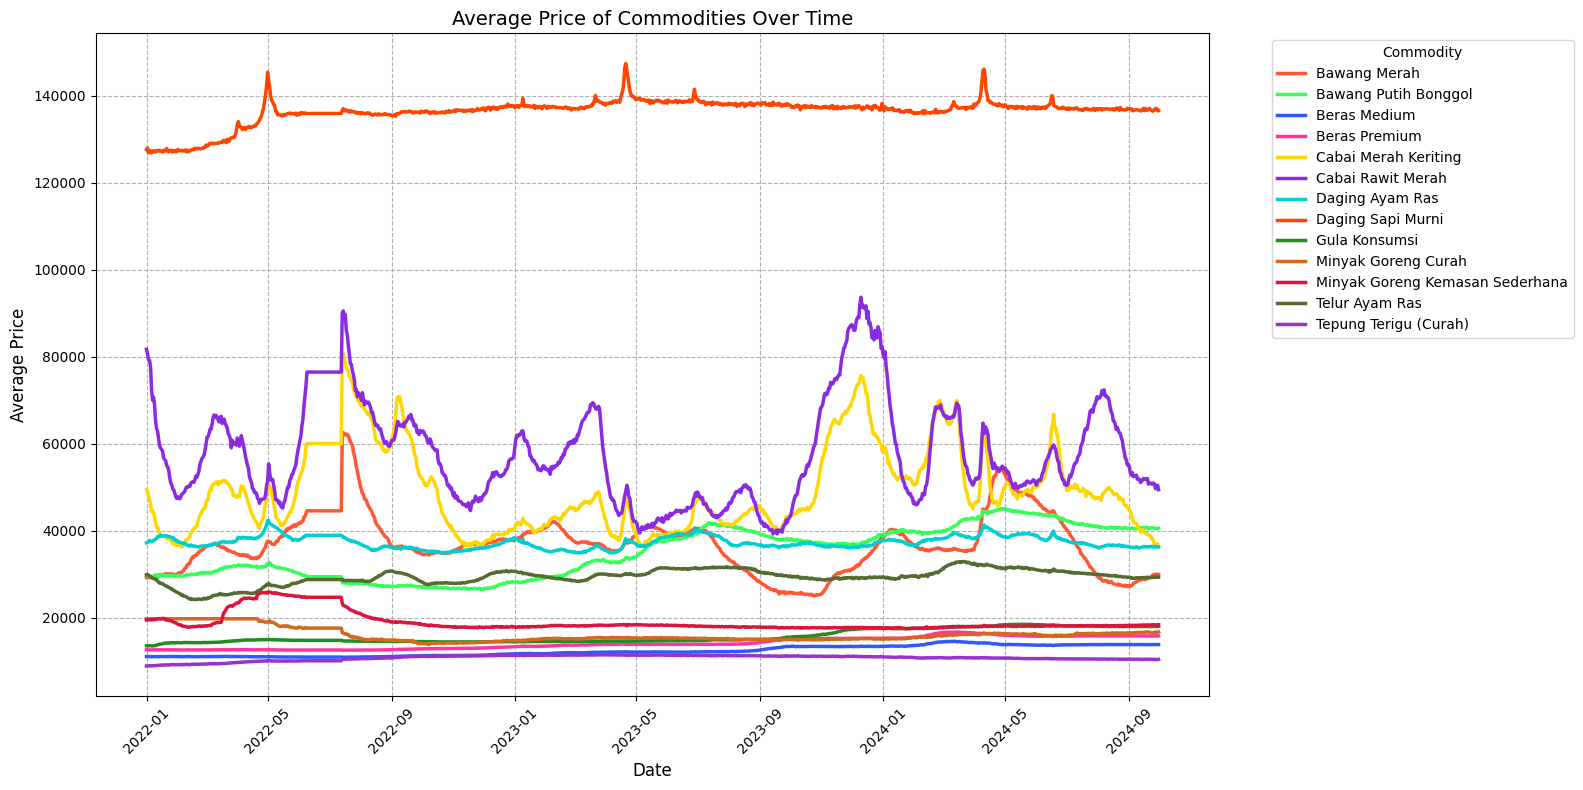

In [5]:
df_avg = dfFull.groupby(["Date", "Commodity"])["Price"].mean().reset_index()

# Define a custom color palette with 13 distinct colors
colors = ["#FF5733", "#33FF57", "#3357FF", "#FF33A1", "#FFD700",
          "#8A2BE2", "#00CED1", "#FF4500", "#228B22", "#D2691E",
          "#DC143C", "#556B2F", "#9932CC"]  # 13 colors

# Create a figure
plt.figure(figsize=(16, 8))

# Plot each commodity with a different color
for i, commodity in enumerate(df_avg["Commodity"].unique()):
    subset = df_avg[df_avg["Commodity"] == commodity]
    plt.plot(subset["Date"], subset["Price"], label=commodity, 
             color=colors[i % len(colors)], linewidth=2.5, alpha=1)  # Ensure alpha is 1

# plt.xlim(pd.Timestamp("2022-06-01"), pd.Timestamp("2022-07-30"))

# Formatting the plot
plt.title("Average Price of Commodities Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title="Commodity", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside
plt.grid(True, linestyle="--", alpha=1)

# Show plot
plt.tight_layout()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb

Data Learning

In [7]:

# Extract day and month
dfFull["Day"] = dfFull["Date"].dt.day
dfFull["Month"] = dfFull["Date"].dt.month

# Extract days since the first date in the dataset
dfFull["Days"] = (dfFull["Date"]- dfFull["Date"].min()).dt.days 

# Label Encoding for categorical columns
le_provinsi = LabelEncoder()
dfFull["Provinsi"] = le_provinsi.fit_transform(dfFull["Provinsi"])

le_commodity = LabelEncoder()
dfFull["Commodity"] = le_commodity.fit_transform(dfFull["Commodity"])

# Drop the original Date column if not needed
dfFull = dfFull.drop(columns=["Date","Day","Month"])

# Check the result
dfFull.info()
dfFull

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443768 entries, 0 to 443767
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Provinsi   443768 non-null  int64  
 1   Price      443768 non-null  float64
 2   Commodity  443768 non-null  int64  
 3   Days       443768 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 13.5 MB


,Provinsi,Price,Commodity,Days
0,0,28970.0,0,0
1,0,27440.0,1,0
2,0,11030.0,2,0
3,0,12080.0,3,0
4,0,22360.0,4,0
...,...,...,...,...
443763,33,17920.0,8,1003
443764,33,16280.0,9,1003
443765,33,18100.0,10,1003
443766,33,27640.0,11,1003


In [8]:
# Splitting Data

X = dfFull.drop(columns=["Price"]) 
Y = dfFull["Price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
# Modelling

model = RandomForestRegressor(n_estimators=500)
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=500)

In [ ]:
# Evaluation

y_pred = model.predict(X_test)
mae = mean_absolute_error(Y_test, y_pred)
mape = mean_absolute_percentage_error(Y_test, y_pred)
print(mae)
print(mape)

ValueError: Found input variables with inconsistent numbers of samples: [88754, 40664]

Prediction for Submission

In [13]:
# Read Submission File
submission = pd.read_csv("sample_submission.csv")

# Extract Commodity, Provinsi, and Date from the 'id' column
submission["Commodity"] = submission["id"].apply(lambda x: x.split("/")[0])
submission["Provinsi"] = submission["id"].apply(lambda x: x.split("/")[1])
submission["Date"] = pd.to_datetime(submission["id"].apply(lambda x: x.split("/")[2]))

# Extract Day and Month instead of Days
submission["Day"] = submission["Date"].dt.day
submission["Month"] = submission["Date"].dt.month

# Extract days since the first date in the dataset
submission["Days"] = (submission["Date"] - submission["Date"].min()).dt.days

# Apply Label Encoding (must be fitted on training data)
submission["Provinsi"] = le_provinsi.transform(submission["Provinsi"])
submission["Commodity"] = le_commodity.transform(submission["Commodity"])

# Drop the Date column if not needed
submission = submission.drop(columns=["Date"])

# Check the result
submission.info()
submission

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40664 entries, 0 to 40663
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         40664 non-null  object
 1   price      40664 non-null  int64 
 2   Commodity  40664 non-null  int64 
 3   Provinsi   40664 non-null  int64 
 4   Day        40664 non-null  int32 
 5   Month      40664 non-null  int32 
 6   Days       40664 non-null  int64 
dtypes: int32(2), int64(4), object(1)
memory usage: 1.9+ MB


,id,price,Commodity,Provinsi,Day,Month,Days
0,Bawang Merah/Aceh/2024-10-01,0,0,0,1,10,0
1,Bawang Merah/Aceh/2024-10-02,0,0,0,2,10,1
2,Bawang Merah/Aceh/2024-10-03,0,0,0,3,10,2
3,Bawang Merah/Aceh/2024-10-04,0,0,0,4,10,3
4,Bawang Merah/Aceh/2024-10-05,0,0,0,5,10,4
...,...,...,...,...,...,...,...
40659,Tepung Terigu (Curah)/Sumatera Utara/2024-12-27,0,12,33,27,12,87
40660,Tepung Terigu (Curah)/Sumatera Utara/2024-12-28,0,12,33,28,12,88
40661,Tepung Terigu (Curah)/Sumatera Utara/2024-12-29,0,12,33,29,12,89
40662,Tepung Terigu (Curah)/Sumatera Utara/2024-12-30,0,12,33,30,12,90


In [16]:
# Predict

X_test = submission[["Provinsi", "Commodity", "Days"]]
submission["price"] = model.predict(X_test)

submission[["id", "price"]].to_csv("final_submission.csv", index=False)